In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-spam-email-detection/spam Emails NLP.csv


In [30]:
!pip install nltk

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Load the dataset
sms = pd.read_csv("/kaggle/input/nlp-spam-email-detection/spam Emails NLP.csv",encoding='latin-1')
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [34]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
print(" no of rows", len(sms))

 no of rows 5572


In [36]:
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [37]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [38]:
sms.duplicated().sum()

403

In [39]:
sms.drop_duplicates(inplace=True)
sms.duplicated().sum()

0

In [40]:
sms.isnull().sum()

label    0
text     0
dtype: int64

In [41]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

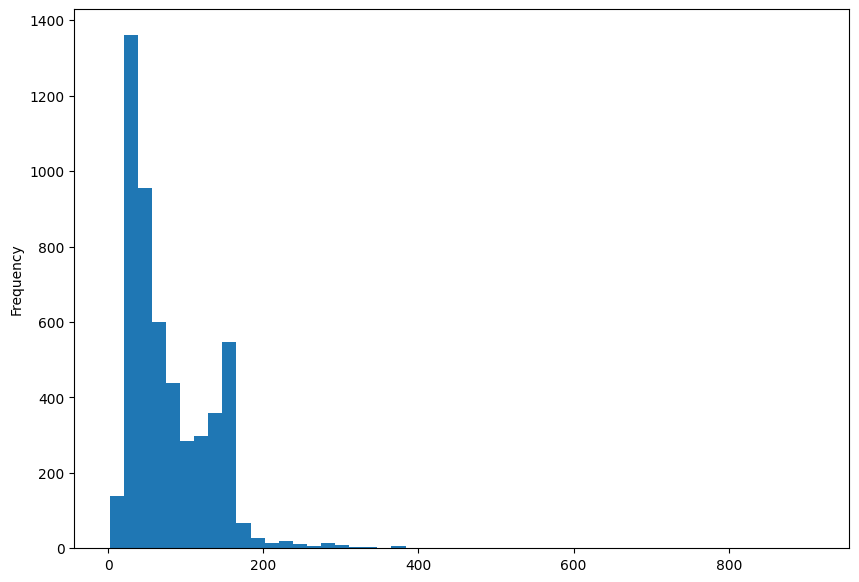

In [42]:
sms['length'].plot(bins=50, kind='hist',figsize=(10,7))

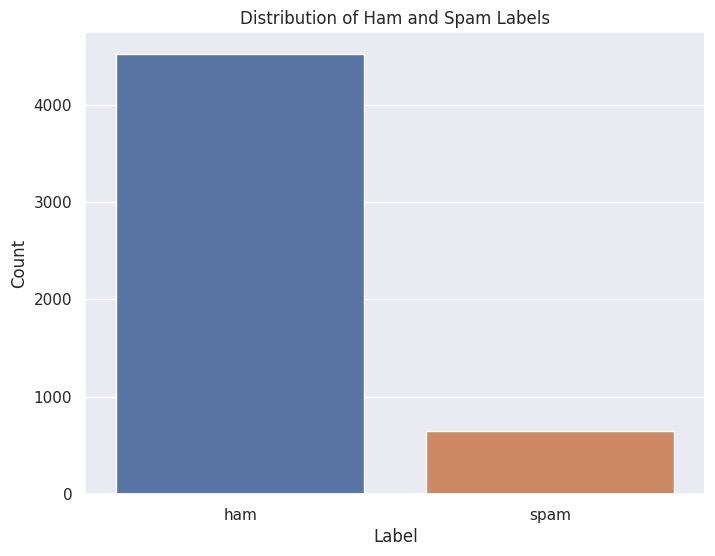

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=sms)
plt.title('Distribution of Ham and Spam Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [44]:
# Preprocess the data
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary (0 for ham, 1 for spam)


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sms['text'], sms['label'], test_size=0.2, random_state=42)


In [46]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [47]:
def preprocess_text(text):
    words = word_tokenize(text)
    processed_words = [stemmer.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return " ".join(processed_words)

In [48]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [49]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [50]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)


In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [52]:
# Print the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.971953578336557

Confusion Matrix:
[[889   0]
 [ 29 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [53]:
def predict_spam_or_ham(text_input):
    processed_input = preprocess_text(text_input)
    vectorized_input = vectorizer.transform([processed_input])
    prediction = classifier.predict(vectorized_input)[0]
    return "spam" if prediction == 1 else "not spam"

# Example usage
user_input = input("Enter a text: ")
prediction_result = predict_spam_or_ham(user_input)
print(f"Prediction: {prediction_result}")


Enter a text:  get a discount of 50%


Prediction: spam
